# TIME SERIES

In [1]:
#About the data:-

#We only have one day data in the year 2009(31-12-2009) to 15-11-2017.
#As said in data description The file contains company's last 8 years of stock details and investment details..
#In between many days data are missing(non_monotonic)

# Extra step tried here,now getting a different warning

In [ ]:
# Here i have Converted date/time index to period[D] as our data is in days.This overcame the warning of :-
#ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
#   df_oil_train.index = pd.DatetimeIndex(df_oil_train.index).to_period('D')

# Doubts:-

# Start(1.In this notebook,till now--Analysis of 'Oil Investment')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Company Stock and Investment.csv')

In [4]:
df.head(30)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
5,08-01-2010,0.001269,-0.013097,0.006648,0.027077
6,11-01-2010,-0.002417,0.023297,-0.008822,-0.024041
7,12-01-2010,-0.021202,-0.001518,-0.011375,-0.022715
8,13-01-2010,-0.013987,-0.020847,0.014106,0.013820
9,14-01-2010,-0.003892,0.009758,-0.005792,-0.013632


# Making new the dataset for different feature separate analysis one at a time.

# 1.For 'Oil Investments' feature

In [5]:
df_oil=df[["Date","Oil Investments"]]
df_oil.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


# 2.For 'Gold Investments' feature

In [6]:
df_gold=df[['Date','Gold Investments']]
df_gold.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


# 3.For 'Comp stock' feature

In [7]:
df_comp=df[['Date','Comp Stock']]
df_comp.head()

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849


# We will start analysis with 'Oil Investments' feature

# Checking for white noise

In [8]:
df_oil['Date'].nunique() 

1984

# All unique values ,  i.e  No white noise in data.
# We can proceed with time series analysis.

In [9]:
df_oil.shape

(1984, 2)

In [10]:
(8*365)-(df_oil.shape[0])
#7years * 365 - no.of data in dataset= no. of missing days data  

936

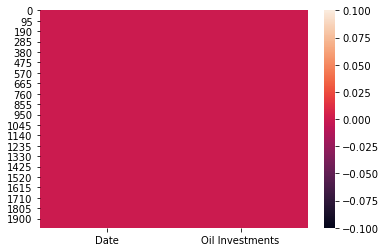

In [11]:
import seaborn as sns
sns.heatmap(df_oil.isnull())

In [12]:
df_oil['Date'].dtypes

dtype('O')

In [13]:
df_oil.shape

(1984, 2)

In [14]:
df_oil.tail(30)

,Date,Oil Investments
1954,05-10-2017,0.015800
1955,06-10-2017,-0.028549
1956,09-10-2017,0.004864
1957,10-10-2017,0.027229
1958,11-10-2017,0.007265
1959,12-10-2017,-0.013450
1960,13-10-2017,0.016202
1961,16-10-2017,0.008361
1962,17-10-2017,0.000193
1963,18-10-2017,0.003470


In [15]:
# Convert 'Date' into Datetime
df_oil['Date']=pd.to_datetime(df_oil['Date'])


<ipython-input-15-7a3e772b3d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil['Date']=pd.to_datetime(df_oil['Date'])


In [16]:
df_oil.head(20)

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256
5,2010-08-01,0.001269
6,2010-11-01,-0.002417
7,2010-12-01,-0.021202
8,2010-01-13,-0.013987
9,2010-01-14,-0.003892


In [17]:
df_oil.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


In [18]:
df_oil['Date'].dtypes

dtype('<M8[ns]')

In [19]:
df_oil.set_index('Date',inplace=True)

In [20]:
df_oil.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [21]:
df_oil.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


## Step 2: Visualize the Data

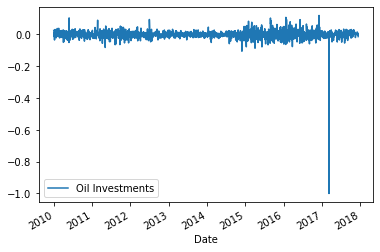

In [22]:
df_oil.plot()

# Selecting the model after visualization above

###### In above plot data looks non-seasonal /  irregular .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement ARIMAX as our data looks non-seasonal /  irregular.
   Before that,Now

###### we will check if data is STATIONARY or not.

# df_oil--> we will implement ARIMAX as our data looks non-seasonal / irregular

# Testing For Stationarity

In [23]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [24]:
test_result=adfuller(df_oil['Oil Investments']) # adfuller give us 5 values

In [25]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [26]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [27]:
adfuller_test(df_oil['Oil Investments']) #call the function

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
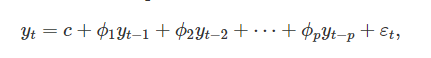

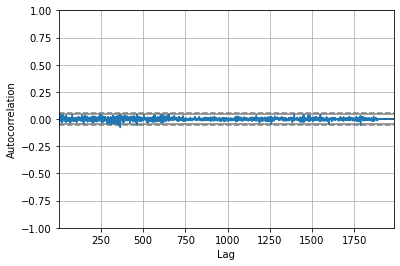

In [28]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_oil['Oil Investments']) 
plt.show()

# Splitting the data(train,validation,test)
##Make 3 split of data one for train,one for test and final for validation.eg( 2009-2017 =8 year, 4yr - train,2yr- validate,
2yr for test(last 2 year, 16-2017).



# 1.training set 4/5years data--2009(just 1 data '2009-12-31'),10,11,12,2013

In [29]:
df_oil_train=df_oil[:1007]
df_oil_train.head()# 4/5years data--2009(just 1 data '2009-12-31'),10,11,12,2013

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [30]:
df_oil_train.tail()

,Oil Investments
Date,
2013-12-24,0.002535
2013-12-26,0.003135
2013-12-27,0.007663
2013-12-30,-0.010406
2013-12-31,-0.007381


# 2.Validation set 2years data--2014-2015

In [31]:
df_oil_val=df_oil[1007:1511]
df_oil_val.head()

,Oil Investments
Date,
2014-02-01,-0.030865
2014-03-01,-0.015556
2014-06-01,-0.005766
2014-07-01,0.002040
2014-08-01,-0.015111


In [32]:
df_oil_val.tail()

,Oil Investments
Date,
2015-12-24,0.023395
2015-12-28,-0.033493
2015-12-29,0.041804
2015-12-30,-0.034055
2015-12-31,0.014758


# 3.Test set 2years data--2016-2017

In [33]:
df_oil_test=df_oil[1511:]
df_oil_test.head()

,Oil Investments
Date,
2016-04-01,-0.008618
2016-05-01,-0.022820
2016-06-01,-0.055602
2016-07-01,-0.020018
2016-08-01,-0.002704


In [34]:
df_oil_test.tail()

,Oil Investments
Date,
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352
2017-11-14,-0.019376
2017-11-15,-0.007006


# Plotting ACF(Autocorrelation) & PACF(Partial Autocorrelation)

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

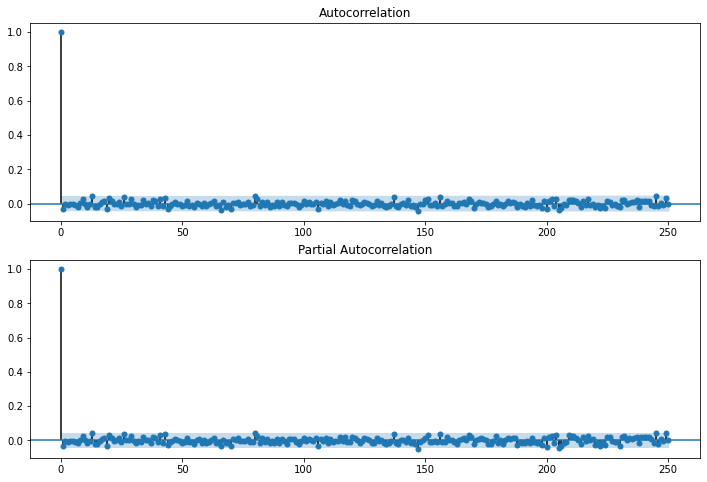

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_oil['Oil Investments'],lags=250,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_oil['Oil Investments'],lags=250,ax=ax2)

# Model Building-->Arima model Implementation

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

# Training the model(df_oil_train)

# Converting date/time index to period[D] as our data is in days.

In [38]:
df_oil_train.index = pd.DatetimeIndex(df_oil_train.index).to_period('D')
                         #changing the dataframe index to period in days

In [39]:
df_oil_train.index.dtype

period[D]

In [40]:
df_oil_train.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [41]:
model=ARIMA(df_oil_train['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


# why this warning above?(some data in middle is missing-non monotonic)

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2640.093
Method:                       css-mle   S.D. of innovations              0.017
Date:                Thu, 15 Oct 2020   AIC                          -5272.186
Time:                        12:42:37   BIC                          -5252.531
Sample:                             1   HQIC                         -5264.718
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.302e-07   1.89e-06     -0.386      0.699   -4.44e-06    2.98e-06
ar.L1.D.Oil Investments    -0.0024      0.032     -0.075      0.940      -0.064       0.060
ma.L1.D.Oil Investments    -1.0000      0.003   -383.838      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -423.8953           +0.0000j          423.8953            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
results.forecast(10) #interpretation??

(array([5.47857329e-05, 3.65118119e-05, 3.58230190e-05, 3.50927414e-05,
        3.43625617e-05, 3.36323818e-05, 3.29022019e-05, 3.21720220e-05,
        3.14418420e-05, 3.07116621e-05]),
 array([0.01747997, 0.01748001, 0.01748001, 0.01748001, 0.01748001,
        0.01748001, 0.01748001, 0.01748001, 0.01748001, 0.01748001]),
 array([[-0.03420532,  0.03431489],
        [-0.03422369,  0.03429671],
        [-0.03422437,  0.03429602],
        [-0.0342251 ,  0.03429529],
        [-0.03422583,  0.03429456],
        [-0.03422656,  0.03429383],
        [-0.03422729,  0.0342931 ],
        [-0.03422803,  0.03429237],
        [-0.03422876,  0.03429164],
        [-0.03422949,  0.03429091]]))

# Predicting on validation set & visualizing

In [44]:
df_oil_val.index.dtype

dtype('<M8[ns]')

# Converting date/time index to period[D] as our data is in days.

In [45]:
df_oil_val.index = pd.DatetimeIndex(df_oil_val.index).to_period('D')
                     #changing the dataframe index to period in days

In [46]:
df_oil_val.index.dtype

period[D]

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-47-c251c7089039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_val['forecast']=results.predict(start=1007,end=1511,dynamic=True)


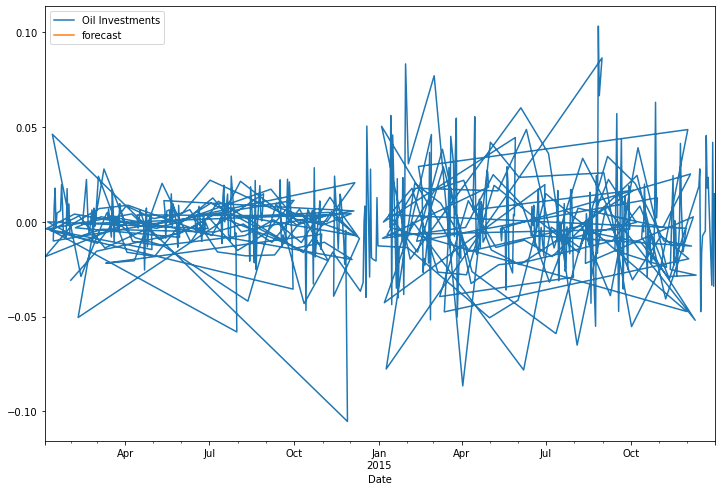

In [47]:
df_oil_val['forecast']=results.predict(start=1007,end=1511,dynamic=True)

df_oil_val[['Oil Investments','forecast']].plot(figsize=(12,8))

In [ ]:
#forecast line(orange) not visible at all as all values are null because there was no prediction
#After converting the date/time index to period a new warining of monotonic is cominy due to some missing days data.

In [49]:
df_oil_val.head()

,Oil Investments,forecast
Date,,
2014-02-01,-0.030865,NaN
2014-03-01,-0.015556,NaN
2014-06-01,-0.005766,NaN
2014-07-01,0.002040,NaN
2014-08-01,-0.015111,NaN


In [50]:
df_oil_val.tail()

,Oil Investments,forecast
Date,,
2015-12-24,0.023395,NaN
2015-12-28,-0.033493,NaN
2015-12-29,0.041804,NaN
2015-12-30,-0.034055,NaN
2015-12-31,0.014758,NaN
